<a href="https://colab.research.google.com/github/pascalfriederich/programming_exercises/blob/main/exercise03_trapping_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def potential(x, y):
    r0 = 1.0
    sigma = 0.7
    r = (x**2.0 + y**2.0)**0.5
    pot = 1.0/(sigma*(2.0*np.pi)**0.5)*np.exp(-(r-r0)**2.0/(2.0*sigma**2.0))
    return(pot)

In [ ]:
pot = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    x = -2.0 + 4.0*(i/100.0)
    y = -2.0 + 4.0*(j/100.0)
    pot_here = potential(x,y)
    pot[i][j]=pot_here

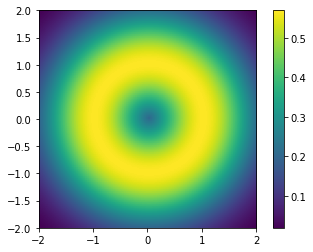

In [ ]:
plt.figure()
plt.imshow(pot, origin="lower", extent=[-2, 2, -2, 2])
plt.colorbar()


In [ ]:
def run_simulation(num_steps=3000, v0 = 1.6, friction=0.01):
    pos = np.array([-2.0, 0.1])
    velocity = np.array([v0, 0.0])
    noise = 0.1
    step = 0.03

    trajectory = [pos.tolist()]
    stopped=False
    for i in range(num_steps):
        x, y = pos
        eps = 0.01
        # get force
        fx = -(potential(x+eps, y) - potential(x-eps, y))/(2.0*eps)
        fy = -(potential(x, y+eps) - potential(x, y-eps))/(2.0*eps)
        force = np.array([fx, fy])

        # update velocity
        velocity *= (1.0-friction)
        velocity += step * force

        # update position
        pos += step*velocity
        trajectory.append(pos.tolist())
        if pos[0]>2.0:
          break
          stopped=True
        elif pos[0]<-2.0:
          break
          stopped=True
        elif pos[1]>2.0:
          break
          stopped=True
        elif pos[1]<-2.0:
          break
          stopped=True
    d = np.linalg.norm(trajectory[-1])
    if d<0.2:
        return(True, d, trajectory)
    else:
        return(False, d, trajectory)

In [ ]:
success, d, trajectory = run_simulation(3000, 1.6)
print(success, d)

True 1.6218957272892035e-07


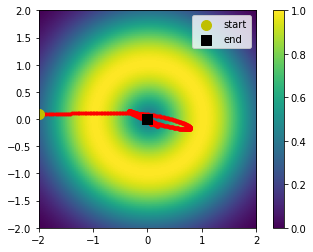

In [ ]:

trajectory = np.array(trajectory)
plt.figure()
plt.imshow(pot, origin="lower", extent=[-2, 2, -2, 2], zorder=0)
plt.plot(trajectory[:,0], trajectory[:,1], "r.-", zorder=1)
plt.scatter([trajectory[0][0]], [trajectory[0][1]], c="y", s=100, marker="o", label="start", zorder=2)
plt.scatter([trajectory[-1][0]], [trajectory[-1][1]], c="k", s=100, marker="s", label="end", zorder=2)
plt.legend(loc="upper right")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.colorbar()

In [ ]:
v0s = np.linspace(0.5, 3.5, 20)
frictions = np.logspace(-3,-1,10)

successes = []
for v0 in v0s:
  successes.append([])
  for f in frictions:
    success_here, d_here, trajectory_here = run_simulation(3000, v0, f)
    successes[-1].append(success_here)


Text(0, 0.5, 'initial velocity')

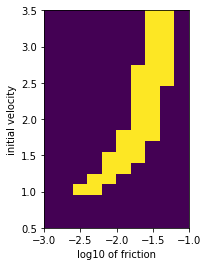

In [ ]:
plt.figure()
plt.imshow(successes, origin="lower", interpolation=None, extent=[-3,-1, 0.5, 3.5], zorder=0)
plt.xlabel("log10 of friction")
plt.ylabel("initial velocity")
